## Run same scenario

In [1]:
import numpy as np
import pandas as pd
import os
from fitness import get_fitness

In [2]:
criterion_header = ["RouteCompletionTest",   
                    "RouteCompletionTest_figure",
                    "OutsideRouteLanesTest", 
                    "OutsideRouteLanesTest_figure",
                    "CollisionTest",         
                    "CollisionTest_figure",
                    "RunningRedLightTest",   
                    "RunningRedLightTest_figure",
                    "RunningStopTest",       
                    "RunningStopTest_figure",
                    "InRouteTest", 
                    "InRouteTest_figure",          
                    "AgentBlockedTest",
                    "AgentBlockedTest_figure",      
                    "Timeout"]

criterion_bool_head = ["RouteCompletionTest",   
                        "OutsideRouteLanesTest", 
                        "CollisionTest",         
                        # "RunningRedLightTest",   
                        # "RunningStopTest",       
                        # "InRouteTest", 
                        # "AgentBlockedTest",
                        "Timeout"]

scenario_header = ["cloudiness",
                   "precipitation",
                   "precipitation_deposits",
                   "wind_intensity",
                   "sun_azimuth_angle",
                   "sun_altitude_angle",
                   "fog_density",
                   "wetness",
                   "fog_falloff",
                   "vehicle_infront", 
                   "vehicle_opposite", 
                   "vehicle_side",
                   "start_offset",
                   "end_offset"]

select_criterions = ["RouteCompletionTest", 
                     "CollisionTest", 
                     "OutsideRouteLanesTest", 
                     "Timeout"] 


In [3]:
surrogate_data  = '../data/routes_short_2023-06-13|18:33:39/'
surrogate_criterions = pd.read_csv(surrogate_data+'criterion.csv',names=criterion_header)
surrogate_scenarios = pd.read_csv(surrogate_data+'scenario.csv',names=scenario_header)
surrogate_fitness = get_fitness(surrogate_data)[select_criterions]

old_data = '../data/routes_short_2023-05-31|16:26:55/'
old_criterions = pd.read_csv(old_data+'criterion.csv',names=criterion_header)
old_scenarios = pd.read_csv(old_data+'scenario.csv',names=scenario_header)
old_fitness = get_fitness(old_data)[select_criterions]

data_label = ['New', 'Old'] 

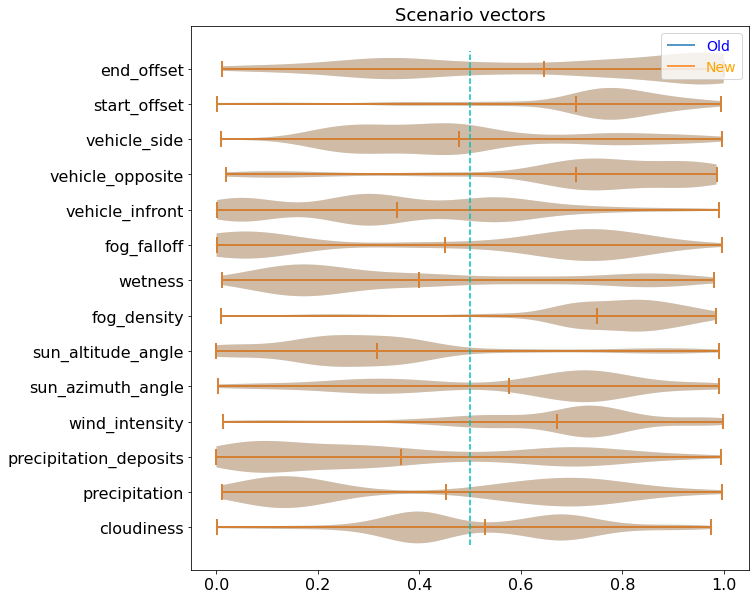

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
vl1 = plt.violinplot(surrogate_scenarios, vert=False, showmeans=True, widths=0.9)
vl2 = plt.violinplot(old_scenarios, vert=False, showmeans=True, widths=0.9)
plt.vlines(0.5, 0.5, 14.5, colors = "c", linestyles = "dashed")
plt.yticks(range(1, 15), scenario_header,fontsize=16)
plt.xticks(fontsize=16)
plt.title("Scenario vectors", fontsize=18)
plt.legend(handles=(vl1['cbars'],vl2['cbars']), labels=[data_label[1],data_label[0]],labelcolor=['blue','orange'],fontsize=14)

plt.show()

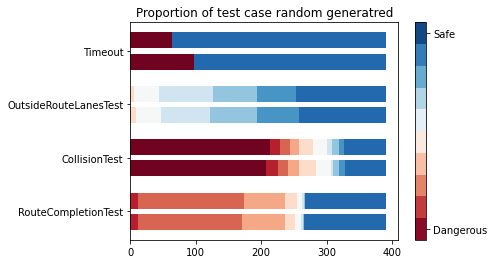

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

cmap = mpl.cm.RdBu
colors = cmap(range(3,253,25))

stack_hist_continuous = np.concatenate([
    [np.histogram(surrogate_fitness['RouteCompletionTest'],   range=(0,1), bins=10)[0]],
    [np.histogram(surrogate_fitness['CollisionTest'],         range=(0,1), bins=10)[0]],
    [np.histogram(surrogate_fitness['OutsideRouteLanesTest'], range=(0,1), bins=10)[0]],
    [np.histogram(surrogate_fitness['Timeout'],               range=(0,1), bins=10)[0]],
])

left = np.zeros(4)
for i in range(10):
    plt.barh(y = np.arange(4)+0.2, width = stack_hist_continuous[:,i], left=left, color = colors[i], height=0.3)
    left += stack_hist_continuous[:,i]

stack_hist_continuous = np.concatenate([
    [np.histogram(old_fitness['RouteCompletionTest'],   range=(0,1), bins=10)[0]],
    [np.histogram(old_fitness['CollisionTest'],         range=(0,1), bins=10)[0]],
    [np.histogram(old_fitness['OutsideRouteLanesTest'], range=(0,1), bins=10)[0]],
    [np.histogram(old_fitness['Timeout'],               range=(0,1), bins=10)[0]],
])

left = np.zeros(4)
for i in range(10):
    plt.barh(y = np.arange(4)-0.2, width = stack_hist_continuous[:,i], left=left, color = colors[i], height=0.3)
    left += stack_hist_continuous[:,i]

plt.yticks(range(4), select_criterions)
cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmap), ticklocation='right',values=range(10), ticks=[0, 9])
cbar.ax.set_yticklabels(['Dangerous', 'Safe'])  # vertically oriented colorbar

plt.title('Proportion of test case random generatred')
plt.show()

Run same scenario, but the distribution is slightly changed, which means that the simulator contains some uncertenty.  
The significant difference on timeout is because the threshold of route completion is changed.